<a href="https://colab.research.google.com/github/ianomunga/NLPKnowledgeGraphs/blob/main/spaCYKnowledgeGraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Making a Simple NLP Knowledge Graph from Text Input using spaCY & NetworkX

In [1]:
#loading the libraries
import spacy
from spacy.lang.en import English
import networkx as nx
import matplotlib.pyplot as plt

For this knowledge graph, the nodes will be text blobs from the Wikipedia info section and the edges will be the connections the tokens have to each other. 

A node is the point in a knowledge graph representing an entity/object.

An edge is the relationship between connecting two objects [nodes], denoted by a line between the two nodes, indicative of a relationship of some kind.

The sentences in the input text will be lemmatized and tokenizes into separate components from which nodes can be made. After the punctuations, whitespace and adjoining words are stripped off, only the token triplets that are used to compose a node-edge-node relationship will remain.

In [4]:
#NLP code to pre-process the text sample and tokenize it into triplets
def getSentences(text):
    nlp = English()
    nlp.add_pipe(nlp.create_pipe('sentencizer'))
    document = nlp(text)
    return [sent.string.strip() for sent in document.sents]
def printToken(token):
    print(token.text, "->", token.dep_)
def appendChunk(original, chunk):
    return original + ' ' + chunk
def isRelationCandidate(token):
    deps = ["ROOT", "adj", "attr", "agent", "amod"]
    return any(subs in token.dep_ for subs in deps)
def isConstructionCandidate(token):
    deps = ["compound", "prep", "conj", "mod"]
    return any(subs in token.dep_ for subs in deps)
def processSubjectObjectPairs(tokens):
    subject = ''
    object = ''
    relation = ''
    subjectConstruction = ''
    objectConstruction = ''
    for token in tokens:
        printToken(token)
        if "punct" in token.dep_:
            continue
        if isRelationCandidate(token):
            relation = appendChunk(relation, token.lemma_)
        if isConstructionCandidate(token):
            if subjectConstruction:
                subjectConstruction = appendChunk(subjectConstruction, token.text)
            if objectConstruction:
                objectConstruction = appendChunk(objectConstruction, token.text)
        if "subj" in token.dep_:
            subject = appendChunk(subject, token.text)
            subject = appendChunk(subjectConstruction, subject)
            subjectConstruction = ''
        if "obj" in token.dep_:
            object = appendChunk(object, token.text)
            object = appendChunk(objectConstruction, object)
            objectConstruction = ''
    print (subject.strip(), ",", relation.strip(), ",", object.strip())
    return (subject.strip(), relation.strip(), object.strip())

#tokenizing the sentences
def processSentence(sentence):
    tokens = nlp_model(sentence)
    return processSubjectObjectPairs(tokens)

#function to plot the knowledge graph of triples
def printGraph(triples):
    G = nx.Graph()
    for triple in triples:
        G.add_node(triple[0])
        G.add_node(triple[1])
        G.add_node(triple[2])
        G.add_edge(triple[0], triple[1])
        G.add_edge(triple[1], triple[2])
    pos = nx.spring_layout(G)
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, edge_color='black', width=1, linewidths=1,
            node_size=500, node_color='teal', alpha=0.9,
            labels={node: node for node in G.nodes()})
    plt.axis('off')
    plt.show()

Megatron is a fictional character from the Transformers franchise created by American toy company Hasbro in 1984, based on a design by Japanese toy company Takara. Usually portrayed as a villain, Megatron is the supreme leader of the Decepticons. Decepticons are a faction of war-mongering Transformers who seek to conquer their home planet of Cybertron and the rest of the known universe. A cruel and power-hungry leader, Megatron leads the Decepticons with an iron fist and has little to no tolerance for failure. He serves as the nemesis of the Autobot leader Optimus Prime. In most incarnations, after meeting his demise, usually at Optimus' hands, Megatron would be resurrected as Galvatron.
Megatron -> nsubj
is -> ROOT
a -> det
fictional -> amod
character -> attr
from -> prep
the -> det
Transformers -> compound
franchise -> pobj
created -> acl
by -> agent
American -> compound
toy -> compound
company -> compound
Hasbro -> pobj
in -> prep
1984 -> pobj
, -> punct
based -> prep
on -> prep
a -

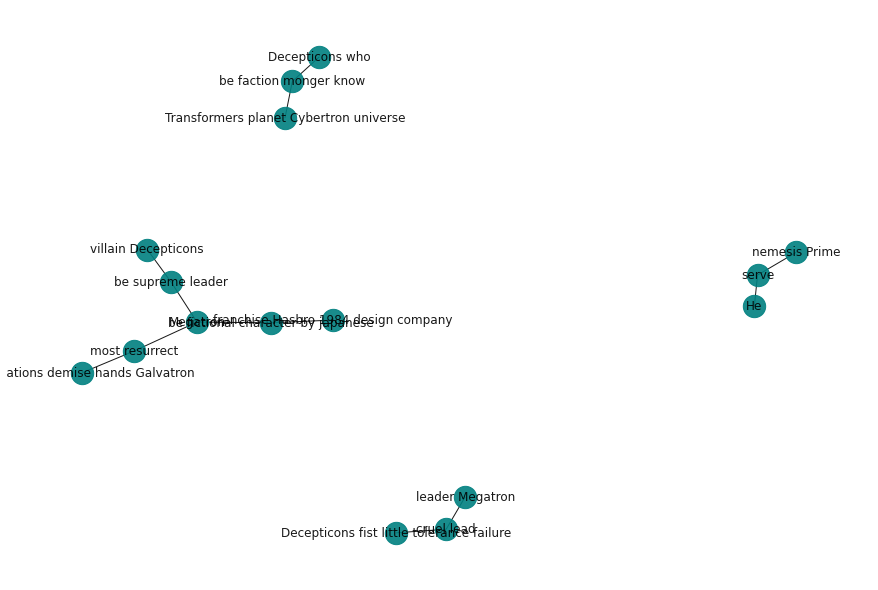

In [7]:
#Now that we have the triplets of nodes and edges, we can plot the knowledge graph 
#question using math.pyplot
if __name__ == "__main__":
       text = "Megatron is a fictional character from the Transformers franchise " \
            "created by American toy company Hasbro in 1984, based on a design by Japanese toy company Takara. " \
            "Usually portrayed as a villain, Megatron is the supreme leader of the Decepticons. " \
            "Decepticons are a faction of war-mongering Transformers who seek to conquer their home planet of Cybertron and the rest of the known universe. " \
            "A cruel and power-hungry leader, Megatron leads the Decepticons with an iron fist and has little to no tolerance for failure. " \
            "He serves as the nemesis of the Autobot leader Optimus Prime. " \
            "In most incarnations, after meeting his demise, usually at Optimus' hands, Megatron would be resurrected as Galvatron." 
sentences = getSentences(text)
nlp_model = spacy.load('en_core_web_sm')
triples = []
print (text)
for sentence in sentences:
    triples.append(processSentence(sentence))
printGraph(triples)

The complexity from this point can be increased to make Knowledge graphs of entire datasets of text samples, with the preprocessing all running automatically. 

I'm going to try more iterations of the pre-processing to refine the plotting so that the node titles don't clash and even larger bodies of text are representable in the Knowledge graph.

Knowledge graphs like these help make more massive models that will work on tasks that need semantic insight become more efficient. I will keep on working on this method as a dimensionality reduction approach, that could possibly be completely automated.